(6, 30)


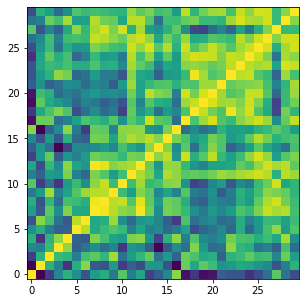

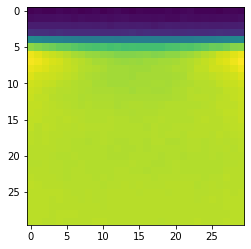

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import python_tools.voidfitter as vf
from python_tools.utilities import FigureUtilities
%matplotlib inline

handle_obs = '/media/epaillasv/BlackIce/eboss/minerva_cats/void_stats/\
redshift_redshift/\
Galaxies_HOD_00*_z0.57_Redshift_Redshift.SVF_recen_ovl0.5.VG_CCF_rmu'

handle_mocks = '/media/epaillasv/BlackIce/eboss/minerva_cats/void_stats/\
redshift_redshift/\
Galaxies_HOD_00*_z0.57_Redshift_Redshift.SVF_recen_ovl0.5.VG_CCF_rmu'

CaiModel = vf.CaiModel(handle_obs, handle_mocks, mock_observation=True)

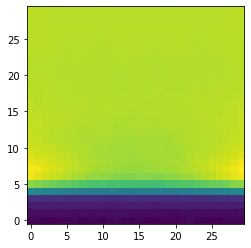

In [5]:
fig, ax = plt.subplots(1, figsize=(4,4))

s = CaiModel.s_for_xi
mu = CaiModel.mu_for_xi
xi_smu = CaiModel.xi_smu(s, mu)

ax.imshow(xi_smu, origin='lower')

plt.show()

In [8]:
print(CaiModel.icov)

[[-1.37725064e+20 -6.62594059e+19  2.60241920e+18 -1.96981986e+20
   7.31569926e+19 -9.78281660e+19  8.37148420e+19 -9.26768671e+19
   5.32926071e+19  2.11684572e+19 -1.48036788e+15  2.34883453e+20
  -1.11329529e+20 -2.20678301e+20  2.76930648e+19  5.69123106e+19
  -1.97395564e+20 -2.64551309e+20 -2.35852245e+20  1.07622227e+20
  -2.21617966e+20  8.50135214e+18 -9.96416110e+19  1.04777132e+20
   6.87606981e+19 -2.20127449e+19  6.98919368e+19  6.59274749e+19
  -3.39581450e+19  8.21541419e+19]
 [ 3.63510383e+19 -9.26007596e+19  9.00430348e+19  1.87268706e+20
   9.32975074e+19  2.36482436e+20  1.25825355e+20 -3.83220256e+19
  -6.18403380e+19 -4.17880105e+20  3.79359112e+19 -1.45415454e+20
   4.64632224e+19  2.42604735e+20  1.76587924e+20  1.67817588e+20
  -2.53958659e+20 -3.57043474e+20 -1.22655109e+20 -8.60329960e+19
   6.02680613e+18  2.61650952e+19  3.49551931e+19 -1.15208007e+20
   3.33214214e+20  7.18220486e+19  8.73767082e+19 -5.27808610e+20
   8.45820367e+19 -2.74388576e+20]
 [-1.4

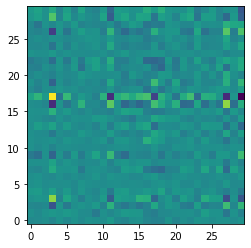

In [7]:
fig, ax = plt.subplots(1, figsize=(4,4))


ax.imshow(CaiModel.icov, origin='lower')

plt.show()

In [4]:
from scipy.special import hyp2f1

# cosmology for Minerva
om_m = 0.285
s80 = 0.828
omega_l = 1. - om_m

bias = 2.3
eff_z = 0.57

az = 1. / (1 + eff_z)
f = ((om_m * (1 + eff_z)**3.) / (om_m * (1 + eff_z)**3 + omega_l))**0.55
growth = az ** 2.5 * np.sqrt(omega_l + om_m * az ** (-3.)) * \
              hyp2f1(5. / 6, 3. / 2, 11. / 6, -(omega_l * az ** 3.) / om_m) / \
              hyp2f1(5. / 6, 3. / 2, 11. / 6, -omega_l / om_m)

beta = f / bias
G = 2 * beta / (3 + beta)

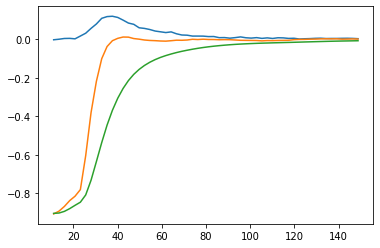

In [5]:
s = CaiModel.s_for_xi[2:]
mu = CaiModel.mu_for_xi
epsilon = 1.0
alpha = 1.0
alpha_para = alpha * epsilon ** (-2/3)
alpha_perp = epsilon * alpha_para

xi0, xibar, xi2 = CaiModel.theory_multipoles(alpha_perp, alpha_para, s, mu)

fig, ax = plt.subplots(1, figsize=(6,4))
ax.plot(s, xi2)
ax.plot(s, xi0)
ax.plot(s, xibar)
plt.show()

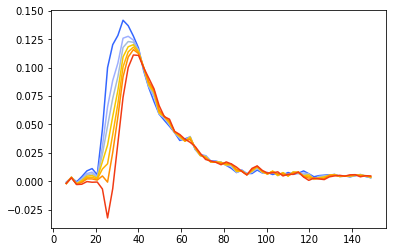

In [6]:
s = CaiModel.s_for_xi
mu = CaiModel.mu_for_xi
epsilons = [0.96, 0.98, 0.99, 1.0, 1.01, 1.02, 1.04]

fu = FigureUtilities()
colors = fu.RdYlBu[[1, 2, 3, 4, 5, 6, 7, 8]]
fig, ax = plt.subplots(1, figsize=(6,4))

for i in range(len(epsilons)):
    epsilon = epsilons[i]

    alpha = 1.0
    alpha_para = alpha * epsilon ** (-2/3)
    alpha_perp = epsilon * alpha_para

    xi0, xibar, xi2 = CaiModel.theory_multipoles(alpha_perp, alpha_para, s, mu)

    ax.plot(s, xi2, color=colors[i])
    
plt.show()

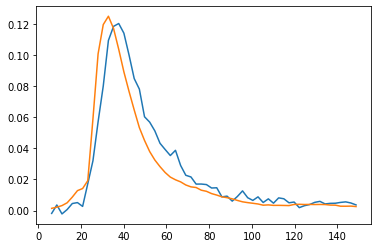

In [7]:
s = CaiModel.s_for_xi
mu = CaiModel.mu_for_xi
fu = FigureUtilities()
colors = fu.RdYlBu[[1, 2, 3, 4, 5, 6, 7, 8]]
fig, ax = plt.subplots(1, figsize=(6,4))

epsilon = 1.0

xi2 = CaiModel.get_AP_multipole(CaiModel.xi2_APSpline, epsilon)
xi0 = CaiModel.get_AP_multipole(CaiModel.xi0_APSpline, epsilon)
xibar = CaiModel.get_AP_multipole(CaiModel.xibar_APSpline, epsilon)

beta_test=0.5
G_test = 2 * beta_test / (3 + beta_test)

ax.plot(s, xi2)
ax.plot(s, G_test * (xi0 - xibar))

plt.show()


In [8]:
CaiModel.run_mcmc()

[-0.00185108  0.00356156 -0.00218163  0.00062347  0.00449425]
[-0.9269591  -0.91837602 -0.90800009 -0.89357215 -0.86933491]
[-4.68286705e+18  1.62352662e+19  5.40945687e+19 -1.89490863e+19
  7.00232162e+18  7.47277312e+18 -1.37013137e+20 -7.96995298e+19
 -3.26390041e+19  8.70047479e+19  3.60993015e+19  2.24954558e+19
  4.44202799e+19 -1.84808477e+19 -1.41829787e+20  5.90312548e+18
 -1.39213373e+19  4.69371580e+19 -1.02519729e+20 -3.18869144e+19
  6.03333995e+19 -2.42603068e+19  5.81496810e+19  1.72545110e+20
  2.03336692e+20  2.48668857e+19  1.87753514e+20 -3.48289339e+19
 -3.40675672e+20 -1.39224929e+20 -2.08898944e+20 -8.22786023e+19
 -2.37957454e+20 -2.53212527e+19  1.89042678e+19 -5.18476621e+19
 -1.17118992e+20  2.80438973e+18  4.11836567e+19 -6.03715632e+19
  3.71562989e+19  1.84120716e+19 -2.97467827e+19 -2.10051952e+19
 -1.13230486e+20  1.12472918e+19  2.61923870e+19 -2.88730067e+19
  7.22744571e+18  2.93827051e+19  3.52675711e+19 -7.98621833e+19
 -9.01186915e+19  5.34120496e+1

[-0.00185108  0.00356156 -0.00218163  0.00062347  0.00449425]
[-0.9269591  -0.91837602 -0.90800009 -0.89357215 -0.86933491]
[-4.68812771e+18  1.62287442e+19  5.40653828e+19 -1.89355173e+19
  6.99107287e+18  7.47876098e+18 -1.36938896e+20 -7.96515932e+19
 -3.26189983e+19  8.69708851e+19  3.60886115e+19  2.24919246e+19
  4.43922471e+19 -1.84740017e+19 -1.41760787e+20  5.89919053e+18
 -1.39066689e+19  4.69100830e+19 -1.02494193e+20 -3.18735873e+19
  6.03062724e+19 -2.42442911e+19  5.81193419e+19  1.72525880e+20
  2.03244334e+20  2.48325240e+19  1.87613080e+20 -3.47916604e+19
 -3.40497455e+20 -1.39151028e+20 -2.08786840e+20 -8.22411985e+19
 -2.37844197e+20 -2.53382493e+19  1.88682478e+19 -5.18342137e+19
 -1.17070470e+20  2.79256226e+18  4.11531929e+19 -6.03437754e+19
  3.71371876e+19  1.84077521e+19 -2.97326229e+19 -2.10030016e+19
 -1.13180313e+20  1.12522935e+19  2.61840405e+19 -2.88566104e+19
  7.22560616e+18  2.93594693e+19  3.52621692e+19 -7.97756406e+19
 -9.00981349e+19  5.33353822e+1

Traceback (most recent call last):
  File "/home/epaillasv/code/anaconda3/lib/python3.7/site-packages/emcee/ensemble.py", line 546, in __call__
    return self.f(x, *self.args, **self.kwargs)
  File "/home/epaillasv/code/void_finder/python_tools/voidfitter.py", line 178, in log_probability
    return lp + self.log_likelihood(theta)
  File "/home/epaillasv/code/void_finder/python_tools/voidfitter.py", line 160, in log_likelihood
    time.sleep(5)
KeyboardInterrupt


KeyboardInterrupt: 